In [1]:
import pandas as pd
import numpy as np

import warnings

import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)

In [126]:
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso

In [37]:
x_data_generated, y_data_generated = make_classification(scale=1)

In [38]:
x_data_generated = pd.DataFrame(x_data_generated)

In [39]:
y_data_generated = pd.Series(y_data_generated)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, 
                                                    y_data_generated, 
                                                    test_size=.2, 
                                                    random_state=42,
                                                    shuffle=True
                                                   )

In [119]:
all_par = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()
all_par

0.55

In [44]:
data = x_data_generated.copy()

In [45]:
data[20] = y_data_generated

<Axes: >

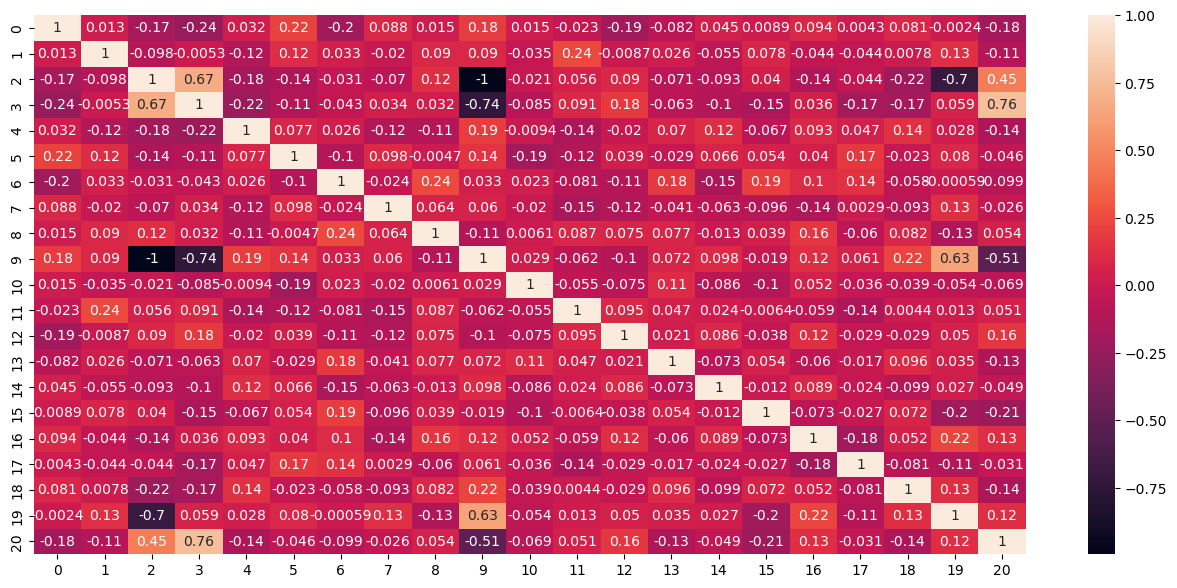

In [55]:
plt.figure(figsize=(16, 7))
sns.heatmap(data.corr(), annot=True)

Коррелируют с целевым признаком (20) следующие признаки:
- Признак 2 с коэффициентом корреляции 0.45
- Признак 3 с коэффициентом корреляции 0.76
- Признак 9 с коэффициентом корреляции -0.51

In [122]:
x_after_corr = x_data_generated[[2, 3, 9]]

In [124]:
X_train, X_test, y_train, y_test = train_test_split(x_after_corr, 
                                                    y_data_generated, 
                                                    test_size=.2, 
                                                    random_state=42,
                                                    shuffle=True
                                                   )
corr_ = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()
corr_

0.8

In [56]:
from sklearn.feature_selection import VarianceThreshold

In [94]:
VT = VarianceThreshold()

In [99]:
VT.fit(x_data_generated)

VarianceThreshold()

In [100]:
VT.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

VarianceThreshold предлагает оставить все признаки.  
Повторять измерение точности модели не имеет смысла. 

In [101]:
from sklearn.feature_selection import SelectKBest

In [102]:
SKB = SelectKBest(k=5)

In [104]:
SKB.fit_transform(x_data_generated, y_data_generated)

array([[ 4.65830939e-01, -7.60666938e-01, -1.88626298e+00,
         1.04286516e+00, -7.22028487e-01],
       [ 3.00915874e-02,  2.62132746e+00,  2.46503718e+00,
        -2.99264809e+00, -1.91560967e-01],
       [ 3.43069314e-01,  3.72610778e-01,  1.07112262e+00,
        -5.32765873e-01, -8.75720742e-01],
       [ 1.82021623e-01,  1.59218324e+00,  2.10029246e+00,
        -1.90756209e+00, -9.48824972e-01],
       [ 9.97734550e-01,  2.60383440e-01, -9.47649952e-02,
        -2.46670859e-01, -1.16387085e+00],
       [ 8.41655394e-03, -1.33683877e+00,  3.61001748e-01,
         1.28513855e+00, -1.49621896e+00],
       [ 9.72714196e-01,  1.69616808e+00,  1.94149206e+00,
        -1.98805089e+00,  3.12245937e-01],
       [ 1.64428770e+00, -5.08659647e-02, -3.75486985e-01,
         1.06884893e-01,  1.59967233e-01],
       [ 5.15253911e-01, -1.32964728e+00, -2.22183611e+00,
         1.66272483e+00,  1.05139534e+00],
       [-6.98604696e-02,  2.35435461e+00,  5.88765327e-01,
        -2.44573417e+00

In [110]:
cols = SKB.get_support()

In [112]:
new_cols = []
for i, el in enumerate(cols):
    if el:
        new_cols.append(i)

In [114]:
x_after_skb = x_data_generated[new_cols]

In [121]:
X_train, X_test, y_train, y_test = train_test_split(x_after_skb, 
                                                    y_data_generated, 
                                                    test_size=.2, 
                                                    random_state=42,
                                                    shuffle=True
                                                   )

skb_par = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()
skb_par

0.75

In [157]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [139]:
X_train, X_test, y_train, y_test = train_test_split(x_data_generated, 
                                                    y_data_generated, 
                                                    test_size=.2, 
                                                    random_state=42,
                                                    shuffle=True
                                                   )

In [144]:
lasso = Lasso()

In [145]:
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

-0.015782828282828065

In [154]:
SFM_las = SelectFromModel(lasso, prefit=False, max_features=5, threshold=-np.inf)

In [155]:
X_tr = SFM_las.fit_transform(X_train, y_train)
X_t = SFM_las.transform(X_test)

In [171]:
X_tr

array([[-1.01723894e+00, -4.44293576e-01,  1.08501329e+00,
        -1.32548399e+00,  8.15311339e-01],
       [ 1.12180682e-01,  1.15143040e+00, -2.83894462e-01,
        -5.70373501e-01,  9.87001018e-01],
       [-1.30719106e+00, -6.37018887e-01,  1.40412893e+00,
         5.28711080e-01,  9.83151568e-01],
       [-1.36843823e+00,  1.83332341e-01,  1.34325624e+00,
        -1.26235595e+00,  1.85973273e+00],
       [ 1.41876362e+00,  1.18788248e+00, -1.59794240e+00,
         1.21524222e-01, -5.82067732e-01],
       [ 1.81501592e+00,  6.49296652e-01, -1.91457362e+00,
        -1.18367649e-01, -1.59484202e+00],
       [-1.48707368e+00, -8.83079436e-01,  1.62094952e+00,
         3.20433842e-01,  9.63709619e-01],
       [ 9.79846949e-01,  1.42980465e+00, -1.19438367e+00,
         7.72402196e-02,  1.93308635e-01],
       [ 2.35435461e+00,  5.88765327e-01, -2.44573417e+00,
        -8.51367268e-01, -2.31635971e+00],
       [-1.54900278e+00, -1.05475239e+00,  1.70855074e+00,
        -5.80599357e-01

In [185]:
lasso.fit(X_tr, y_train)
ls = cross_val_score(LogisticRegression(), X_t, y_test, scoring='accuracy').mean()

In [181]:
rf = RandomForestClassifier(random_state=1)

In [182]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [183]:
rf.feature_importances_

array([0.02407762, 0.02655571, 0.07626244, 0.3400217 , 0.0263851 ,
       0.01784047, 0.02547939, 0.0293573 , 0.0211701 , 0.12656527,
       0.04258758, 0.0123376 , 0.02623404, 0.01899263, 0.01414352,
       0.02890791, 0.03243268, 0.03421271, 0.03612067, 0.04031556])

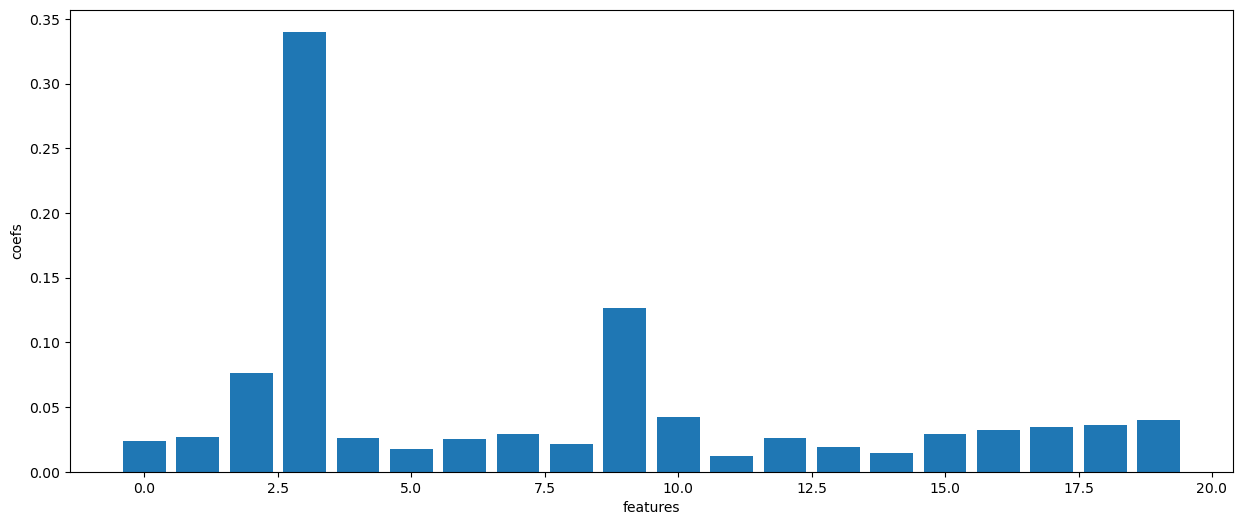

In [187]:
plt.figure(figsize=(15, 6))
plt.bar(np.arange(len(rf.feature_importances_)), rf.feature_importances_)
plt.xlabel('features')
plt.ylabel('coefs');

In [188]:
X_afret_rf = x_data_generated[[2, 3, 9]]

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_afret_rf, 
                                                    y_data_generated, 
                                                    test_size=.2, 
                                                    random_state=42,
                                                    shuffle=True
                                                   )

In [190]:
rf_ = cross_val_score(LogisticRegression(), X_test, y_test, scoring='accuracy').mean()

In [191]:
data_ = {
    'Pure LogisticRegression': {
        'Res': all_par,
        'Params': 19
    },
    'After correlation': {
        'Res': corr_,
        'Params': 3
    },
    'After Variance Threshold': {
        'Res': skb_par,
        'Params': len(new_cols)
    },
    'After Select K Best': {
        'Res': skb_par,
        'Params': 5
    },
    'After Select From Model (Lasso)': {
        'Res': ls,
        'Params': 5
    },
    'After Select From Model (RandomForest)': {
        'Res': rf_,
        'Params': 3
    }
}

In [192]:
pd.DataFrame(data_)

,Pure LogisticRegression,After correlation,After Variance Threshold,After Select K Best,After Select From Model (Lasso),After Select From Model (RandomForest)
Res,0.55,0.8,0.75,0.75,0.85,0.8
Params,19.00,3.0,5.00,5.00,5.00,3.0


Наилучшие результаты получились после использования Select From Model
